In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\tsgee\OneDrive\Desktop\New folder\sesonal flu vaccine"

C:\Users\tsgee\OneDrive\Desktop\New folder\sesonal flu vaccine


In [3]:
flutrain=pd.read_csv("training_set_features.csv")

In [4]:
flutest=pd.read_csv("test_set_features.csv")

In [5]:
flulabels=pd.read_csv("training_set_labels.csv")

In [6]:
print(flutrain.shape)
print(flutest.shape)
print(flulabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [7]:
# Algorithm based Missing Value Imputation - Considers the impact of
# other variables on the missing value and impute accordingly.
# MICE - Multivariate Imputation using Chained Equations is the most
# popular algorithm
# Imputes both numeric and non numeric object/categrical missing values.
# Intitially imputed with mean, median or mode and chained equations are
# built
# Chained Equations wherein the missing value column/variable is treated
# as dependent variable and relevant classification/regression model is
# built and prediction done.
# Missing value will be replaced with predicted value.

In [8]:
flutrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
flutest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [10]:
# Combine both dataframes for preprocessing
combinedf=pd.concat([flutrain,flutest],axis=0)

In [11]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [12]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [13]:
# For using Iterative Imputer in sklearn which is experimental as of now
# 1) remove variables or columns not needed
# 2) Labelencode all object and categorical data but retain the Missing
# value as it is.

In [14]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
original=combinedf

In [17]:
mask=combinedf.isnull()

In [18]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [19]:
combinedf=combinedf.where(~mask,original)

In [20]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [22]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",
                        max_iter=20)

In [23]:
combinedf_impute=imputer.fit_transform(combinedf)

C:\Users\tsgee\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [24]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

<AxesSubplot:>

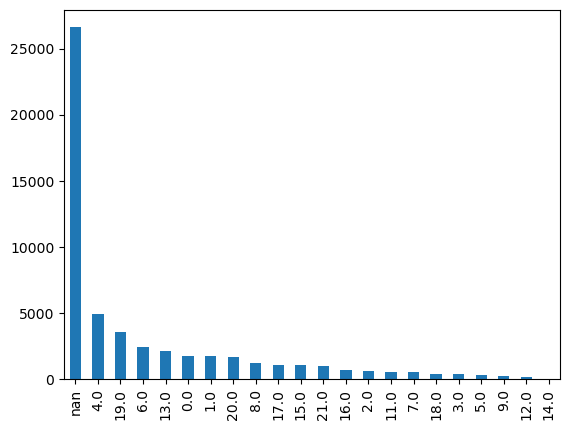

In [25]:
combinedf.employment_industry.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:>

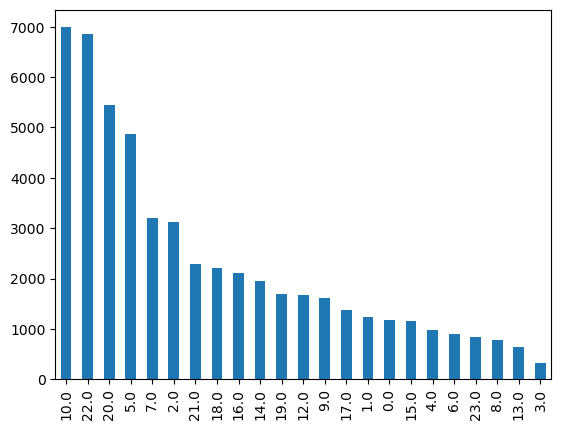

In [26]:
combinedf_impute.employment_occupation.value_counts(
    dropna=False).plot(kind="bar")

In [27]:
combinedf_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

In [28]:
# Split Data back to train & test
flu_train=combinedf_impute.loc[0:26706]

In [29]:
flu_test=combinedf_impute.loc[26707:53414]

In [30]:
print(flu_train.shape)
print(flutrain.shape)
print(flu_test.shape)
print(flutest.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


In [31]:
y=flulabels.seasonal_vaccine
X=flu_train

<AxesSubplot:>

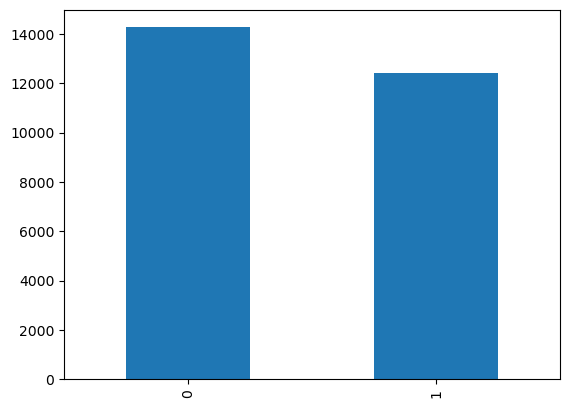

In [32]:
y.value_counts().plot(kind="bar")

In [33]:
y.shape

(26707,)

In [34]:
# Build the following - Score, predict, classfication Report, ROC Curve
# binary Logistic Regression
# Decision Tree
# Random Forest
# Gradient boosting
# Naive Bayes
# Support Vector Machine

In [35]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [36]:
logit=LogisticRegression(max_iter=2000)

In [37]:
logitmodel=logit.fit(X,y)

In [38]:
logitmodel.score(X,y)

0.7725689894035271

In [39]:
logitpredict=logitmodel.predict(X)

In [40]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11516,2756
1,3318,9117


In [41]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



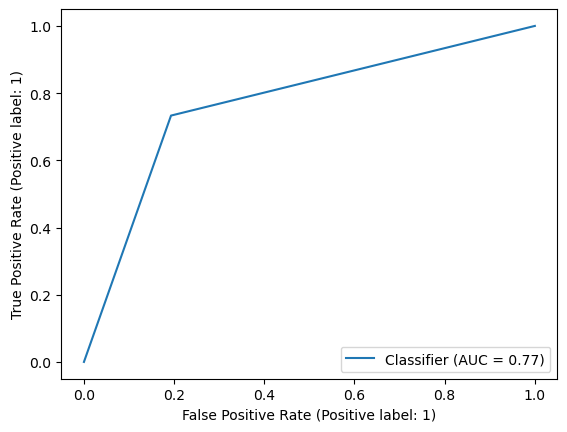

In [42]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree=DecisionTreeClassifier(max_depth=10)

In [45]:
treemodel=tree.fit(X,y)

In [46]:
treemodel.score(X,y)

0.8148051072752462

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(tree,X,y)

array([0.74279296, 0.73511793, 0.74873619, 0.75903389, 0.74667665])

In [49]:
np.mean([0.73886185, 0.74503931, 0.74255757, 0.74705111, 0.74255757])

0.743213482

In [50]:
treepredict=treemodel.predict(X)

In [51]:
pd.crosstab(y,treepredict)

col_0,0,1
seasonal_vaccine,,
0,11901,2371
1,2575,9860


In [52]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     14272
           1       0.81      0.79      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



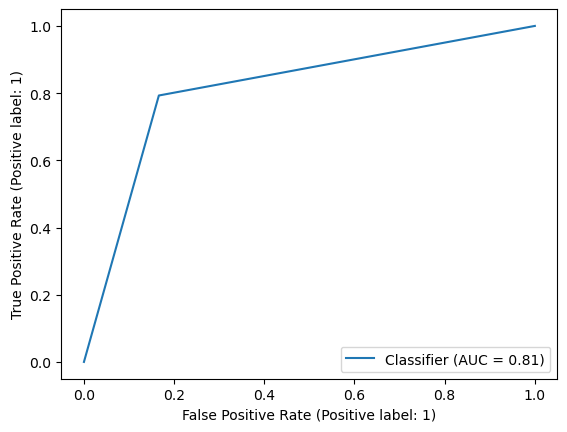

In [53]:
RocCurveDisplay.from_predictions(y,treepredict)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RF=RandomForestClassifier(n_estimators=1000,max_depth=12)

In [56]:
RFmodel=RF.fit(X,y)

In [57]:
RFmodel.score(X,y)

0.8677125847156176

In [58]:
cross_val_score(RF,X,y)

array([0.77873456, 0.77611382, 0.77813144, 0.78262498, 0.77476128])

In [59]:
RFpredict=RFmodel.predict(X)

In [60]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,12712,1560
1,1973,10462


In [61]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14272
           1       0.87      0.84      0.86     12435

    accuracy                           0.87     26707
   macro avg       0.87      0.87      0.87     26707
weighted avg       0.87      0.87      0.87     26707



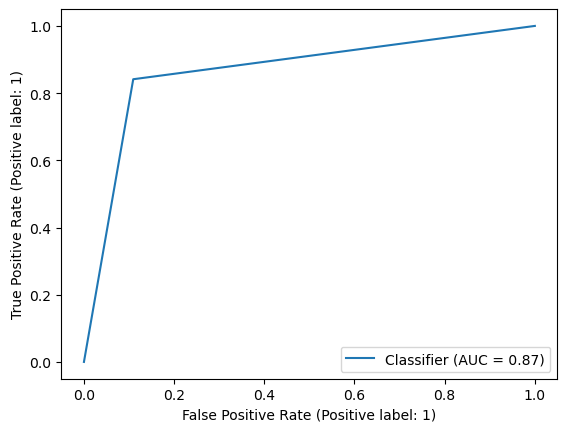

In [62]:
RocCurveDisplay.from_predictions(y,RFpredict)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [65]:
gbmmodel=gbm.fit(X,y)

In [66]:
gbmmodel.score(X,y)

0.8392181824989703

In [67]:
gbmpredict=gbmmodel.predict(X)

In [68]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12190,2082
1,2212,10223


In [69]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14272
           1       0.83      0.82      0.83     12435

    accuracy                           0.84     26707
   macro avg       0.84      0.84      0.84     26707
weighted avg       0.84      0.84      0.84     26707



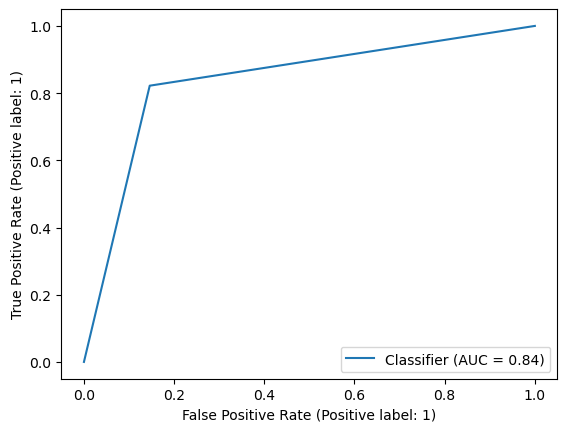

In [70]:
RocCurveDisplay.from_predictions(y,gbmpredict)

In [71]:
from sklearn.naive_bayes import CategoricalNB

In [72]:
nb=CategoricalNB()

In [73]:
nbmodel=nb.fit(X,y)

In [74]:
nbmodel.score(X,y)

0.7547085033886247

In [75]:
nbpredict=nbmodel.predict(X)

In [76]:
pd.crosstab(y,nbpredict)

col_0,0,1
seasonal_vaccine,,
0,10967,3305
1,3246,9189


In [77]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     14272
           1       0.74      0.74      0.74     12435

    accuracy                           0.75     26707
   macro avg       0.75      0.75      0.75     26707
weighted avg       0.75      0.75      0.75     26707



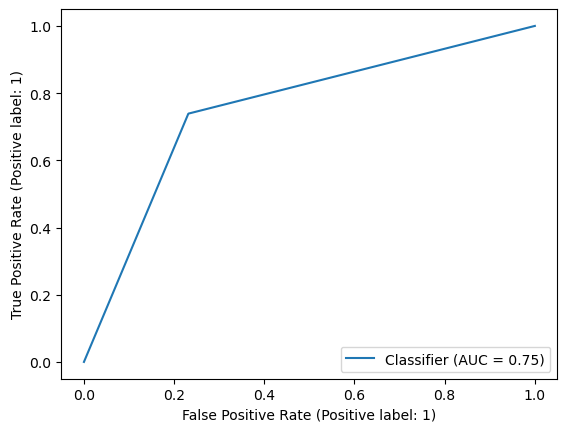

In [78]:
RocCurveDisplay.from_predictions(y,nbpredict)

In [79]:
from sklearn.svm import SVC

In [80]:
svm=SVC()

In [81]:
svmmodel=svm.fit(X,y)

In [82]:
svmmodel.score(X,y)

0.779271352079979